# HW2 NYC Restaurants

## Lufang Liu, Elena Reynolds, Brett Scroggins

### Initialization cell

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rests = pd.read_csv('/Users/brettscroggins/Downloads/' + 
                    'NYC_Restaurants.csv', dtype = unicode)

# Question 1 - Create a unique name for each restaurant.

- Creation of a unique column was added in the format of Name, Building, Street and Zipcode
- Print first 10 values of new column

In [3]:
# Add a column to the data frame with the following format
rest_names = rests.copy()
rest_names['RESTAURANT'] = rests['DBA']+' '+ rests['BUILDING']+' '+\
                                rests['STREET']+' '+rests['ZIPCODE']

In [4]:
# Question 1 Sample
print rest_names[:10]['RESTAURANT']

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


# Question 2 - How many restaurants are included in the data?

- To find the number of unique restaurants , the value counts function was utilized in order to find the length of the data frame

In [5]:
# Create a list of unique restaurant names
number_unique = rest_names['RESTAURANT'].value_counts()
len(number_unique)

# There are 10,114 unique restaurants in this data set

10114

# Question 3 - How many chains are there?

 - In order to find the number of chains, a subset of the data set was partitioned and duplicates based on unique restaurant name were dropped. Once the set was trimmed, a mask was created based on restaurants with more than one location throughout the city

In [6]:
chains_sub = rest_names[['DBA','BUILDING','STREET','ZIPCODE',
                         'RESTAURANT','BORO','CUISINE DESCRIPTION']]

chains_sub = chains_sub.drop_duplicates(subset = 'RESTAURANT')
chains_list = chains_sub['DBA'].value_counts()

mask = chains_list > 1
chains = chains_list[mask]
print "Number of chains:", len(chains)

Number of chains: 368


# Question 4 - Plot a bar graph of the top 20 most popular chains.

- Based on the previous mask created for Question 3, a bar plot of the top 20 most popular chains is shown below.

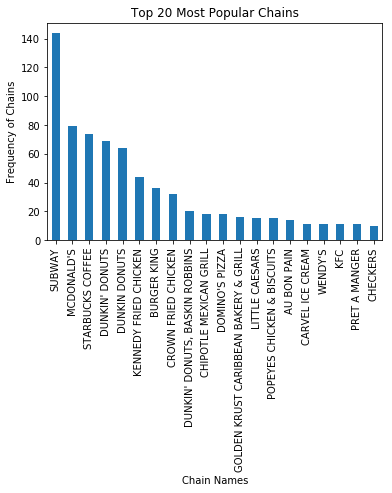

In [10]:
chains = chains_list[mask]
chains[:20].plot(kind='bar')
xlabel('Chain Names')
ylabel('Frequency of Chains')
title('Top 20 Most Popular Chains')

# Question 5 - What fraction of all restaurants are chains?

- A calculation was done for the number of chains in the data set compared to the total number of unique restaurants as a percentage.

In [8]:
decimal = float(chains.sum()) / len(number_unique)

percent = '{0:.1f}%'.format(decimal*100)

percent

# The fraction of restaurants in a chain is as follows:
# 1666 / 10114 = 16.5%

'16.5%'

# Question 6 - Plot the number of non-chain restaurants in each boro.

- In order to find the number of non-chain restaurants in each boro, looking for a value count of 1 for the number of occurences. This was done to exclude all chains. Once the list was formed, a count was done for the number of nonchains in each boro, and then was plotted.

In [9]:
# Create a subset of names and drop duplicates
non_chains_sub = rest_names[['DBA','RESTAURANT','BORO']]
non_chains_sub = non_chains_sub.drop_duplicates(subset = 'RESTAURANT')

# Find the nonchains_count with the value_counts() function to find the
# number of restaurants with less than 2 locations.
nonchains_count = non_chains_sub['DBA'].value_counts()
nonchains_count = nonchains_count[nonchains_count < 2]

# Create a list of names from the index values of the subest of nonchains
names = nonchains_count.index.values

# Using the isin function, a per boro variable is defined to seperate the
# number of nonchain restaurants into seperate boros.
per_boro = non_chains_sub[non_chains_sub['DBA'].isin(names)]
nonchain_boro = per_boro['BORO'].value_counts()[:5]

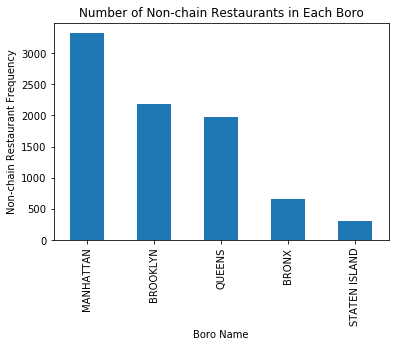

In [10]:
# A bar graph of the number of restaurants per boro is shown below.
nonchain_boro.plot(kind='bar')
xlabel('Boro Name')
ylabel('Non-chain Restaurant Frequency')
title('Number of Non-chain Restaurants in Each Boro')

# Question 7 - Plot the fraction of non-chain restaurants in each boro.

- To find the percent of nonchain restaurants in each boro, a fraction of nonchain in a specific boro was divided by the total number of restaurants in that respective boro. A plot of the proportion in each boro is shown below.

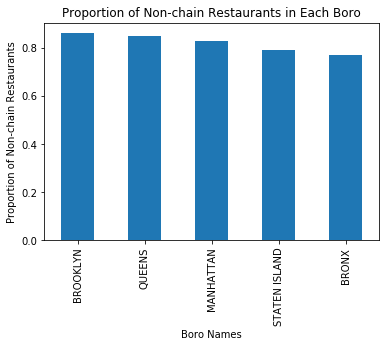

In [11]:
# Return the amount of restaurants in the 5 boros with value_counts()
all_rest = chains_sub['BORO'].value_counts()[:5]

# Create a proportion of nonchains in a boro divided by all in that boro
boro_frac = nonchain_boro/all_rest
boro_frac.sort_values(ascending = False).plot(kind = 'bar')
xlabel('Boro Names')
ylabel('Proportion of Non-chain Restaurants')
title('Proportion of Non-chain Restaurants in Each Boro')

The borough with the most independent restaurants (Manhattan) is not also the one with the highest ratio of independent restaurants. Brooklyn has the highest fraction of nonchain restaurants to all restaurants in the borough.

# Question 8 - Plot the popularity of cuisines.

- To find the most popular cuisines in the data set, a value count was done on every cuisine in the set, and the top 20 were returned. A plot of that is shown below.

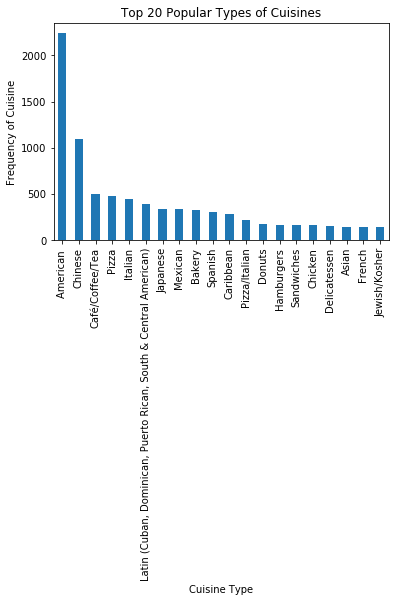

In [12]:
all_pop_cuisines = chains_sub['CUISINE DESCRIPTION']

# Create and plot the top 20 cuisines using value counts
pop_cuisine = all_pop_cuisines.value_counts()[:20]
pop_cuisine.plot(kind = 'bar')
xlabel('Cuisine Type')
ylabel('Frequency of Cuisine')
title('Top 20 Popular Types of Cuisines')

# Question 9 - Plot the cuisines among restaurants which never got cited for violations.

- A list of all clean restaurants is complied below, with the qualification of clean being those NEVER cited for a violation. In order to do this, two masks were created - one while collected all clean restaurants, and one to collect all those with citations. After this was done, the overlap of these two lists were removed, and only those completely clean were left. The resulting value count of those completely clean cuisines is plotted below.

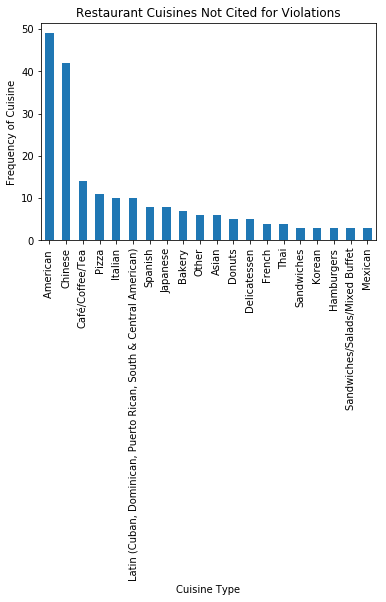

In [13]:
rests_cuisine = rest_names[['CUISINE DESCRIPTION',
                            'RESTAURANT',
                            'VIOLATION CODE']].drop_duplicates()

# Create a mask that has all inspections with no violation
clean_mask = rests_cuisine['VIOLATION CODE'].isnull()
clean = rests_cuisine[clean_mask]

# Create a mask that has all inspections with violations
dirty_mask = rests_cuisine['VIOLATION CODE'].notnull()
dirty = rests_cuisine[dirty_mask]

# Find the overlap using the isin function
not_clean_list = clean['RESTAURANT'].isin(dirty['RESTAURANT'])

# Take the set of all restaurants not appearing the in dirty list every
unique_clean = clean[~not_clean_list]

# Plot the top 20 cleanest cuisines on the bar plot
unique_clean['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')
xlabel('Cuisine Type')
ylabel('Frequency of Cuisine')
title('Restaurant Cuisines Not Cited for Violations')

# Question 10 - What cuisines tend to be the “cleanest”?

- Before the result from the question above could be used, a new list of all cuisines with 20 or more restaurants with that cuisine was compiled. After this was done, the completely clean restaurants from above was compared in a ratio of number of clean restaurants in that cuisine divided by the total number of restaurants in that cuisine. A table below shows the top 10 cleanest cuisines sorted in descending order by proportion.

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


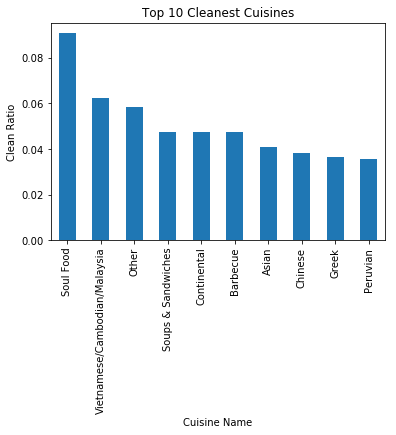

In [28]:
# Create a subset of all cuisines with 20 or more occurances
all_cuisines = all_pop_cuisines.value_counts()
at_least_twenty = all_cuisines[all_cuisines >= 20]

# Of the subest above, return all those clean
list_unique_clean = unique_clean['CUISINE DESCRIPTION'].value_counts()

# Create a ratio of number of clean per cuisine and the value count from
# the subest created above. Results returned.
ratio = list_unique_clean / at_least_twenty
print ratio.sort_values(ascending = False)[:10]
ratio.sort_values(ascending = False)[:10].plot('bar')
title('Top 10 Cleanest Cuisines')
xlabel('Cuisine Name')
ylabel('Clean Ratio')


# Question 11 - What are the most common violations in each borough?

- The most common violations for each boro were found using a mask to return all violations that occured. Once created, that mask was utilized to create a crosstab table of all violations with their respective boro. After compiling, the idxmax function was used to find the most common violation for each boro. The result is returned below.

In [15]:
new_boro_vio = rest_names[['VIOLATION DESCRIPTION','BORO']]

# The missing_mask is created to find to remove inspections with no
# violations in the set.
missing_mask = new_boro_vio['BORO'] != "Missing"
boro_vio = new_boro_vio[missing_mask]

# This crosstab table creates a list of all violations and their boro.
top_boro_vio = pd.crosstab(boro_vio['VIOLATION DESCRIPTION'],
                           boro_vio['BORO'])

# Output is the most common violation for each boro.
top_boro_vio.idxmax()

# All Non-food contact surface improperly constructe...

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Question 12 - What are the most common violations per borough, after normalizing for the relative abundance of each violation?

- To find the normalized abundance, the table created above was edited so that it will normalize by the 'index'. And idxmax was again used to output the most common violation AFTER normalizing.

In [16]:
# Create crosstab with normalize = index
normal_vio = pd.crosstab(boro_vio['VIOLATION DESCRIPTION'],
            boro_vio['BORO'], normalize = 'index')

# Return the most common after normalizing with idxmax() function
normal_vio.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# Question 13 - How many phone area codes correspond to a single zipcode?

- In order to find the number of zipcodes responding to only a single zipcode, only the first 3 digits of a phone number had to be pulled from the entire number. After this was done, and duplicates were dropped, a list of areacodes responding to 1 and only 1 zipcode was stored and the length was found to find the number of area codes in only a single zipcode.

In [17]:
phone_zip = rest_names[['RESTAURANT','ZIPCODE','PHONE']].drop_duplicates()

# Pull only the first three numbers from the phone number and store as
# the areacode
phone_zip['areacode'] = phone_zip['PHONE'].str[:3]

# Drop any duplicates, count the values, then return a list that
# corresponds to area codes in a single area code.
ziplist = phone_zip[['ZIPCODE','areacode']].drop_duplicates()
area_list = ziplist['areacode'].value_counts()
unique_area_zip = area_list[area_list < 2]

# Amount is returned
len(unique_area_zip)

# There are 34 areacodes corresponding to only a single zipcode.

34

# Question 14 - Find common misspellings of street names

Finding the common misspellings of street names took a few steps. They are shown below:
    - Two functions were created to extract the street base and street type from the STREET variable.
    - A new table was created incorporating these two new variables (STREET BASE & STREET TYPE), and the introduction of a BASE & ZIP variable that combined the street's base name and its area code.
    - A second table was created containing ONLY the newly created variables.
    - After this, a merged table was created between our second table and itself, and then trimmed to only have those where one restaurant corresponded with two different spellings of a street.
    - Lastly, a cross-tabulation was done to give the number of times in which different spellings happened, and the max function returned the amount of the asked for street types.

In [18]:
street_names = rest_names[['STREET','ZIPCODE','RESTAURANT']].drop_duplicates()


def get_base(s):
    """Extract street base from restaurant name"""
    # Split the string by spaces, and pick all but the last 
    # as street base.
    s = ' '.join(s.split()[0:-1])
    return s

In [19]:
def get_type(s):
    """Extract street type from restaurant name"""
    # Split the string by spaces, and pick the last as type and the rest
    # as street base.
    return s.split()[-1]
    

In [20]:
# Add to the street_names data frame with the 3 new columns
street_names['STREET BASE'] = street_names['STREET'].map(get_base)
street_names['STREET TYPE'] = street_names['STREET'].map(get_type)
street_names['BASE & ZIP'] = street_names['STREET BASE'] + ' '  + street_names['ZIPCODE']

In [21]:
# Create a new data frame with ONLY the 3 new columns
base_type = street_names[['STREET BASE','STREET TYPE','BASE & ZIP']]
base_type = base_type.drop_duplicates()

In [22]:
# This merged document compares the base_type frame with itself
merged = base_type.merge(base_type,left_on='BASE & ZIP',
                  right_on='BASE & ZIP')

In [23]:
# After creating, the merged document was trimmed so that only those
# with different street type was returned.
mask_diff_type = (merged['STREET TYPE_x'] != merged['STREET TYPE_y'])
trim_merge = merged[mask_diff_type]

In [24]:
# Cross Tabulation
cross_tab = pd.crosstab(trim_merge['STREET TYPE_x'],
                           trim_merge['STREET TYPE_y'])

# Output the most common misspellings
cross_list = cross_tab.idxmax()

# Using the deired streets, find the numbe of occurances
find_list = ['AVE','ST','RD','PL','BOULEARD','BULEVARD']
cross_list[find_list]

# Occurances are as follows:
    # AVE = AVENUE, ST = STREET, RD = ROAD, PL = PLACE,
    # BOULEARD = BLVD, BULEVARD = BLVD

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object